In [162]:
def BS_model(stock_price, var, strike_price, r_f, ttm):
    import scipy.stats
    import numpy as np
    from math import sqrt, exp
    import pandas as pd
    norm_dist = scipy.stats.norm(0, 1)
    d1 = 1/(var * sqrt(ttm)) * (np.log(stock_price/strike_price) +(r_f + (var**2/2))*ttm)
    d2 = d1 - var*sqrt(ttm)
    
    call_value = norm_dist.cdf(d1) * stock_price - norm_dist.cdf(d2) * strike_price * exp(-r_f * ttm)
    put_value = strike_price * exp(-r_f * ttm) - stock_price + call_value
    
    delta_call = norm_dist.cdf(d1)
    delta_put = norm_dist.cdf(d1) - 1
    gamma = norm_dist.pdf(d1)/(stock_price * var * sqrt(ttm))
    vega = stock_price * norm_dist.pdf(d1) * sqrt(ttm)
    theta_call = -(stock_price * norm_dist.pdf(d1) * var)/(2*sqrt(ttm))- (r_f * strike_price * 
                                                                          norm_dist.cdf(d2) * exp(-r_f*ttm))
    theta_put = -(stock_price * norm_dist.pdf(d1) * var)/(2*sqrt(ttm))+ (r_f * strike_price * 
                                                                          norm_dist.cdf(-d2) * exp(-r_f*ttm))
    rho_call = strike_price * ttm * norm_dist.cdf(d2) * exp(-r_f * ttm)
    rho_put = -strike_price * ttm * norm_dist.cdf(-d2) * exp(-r_f * ttm)
    
    price = [call_value, put_value]
    delta = [delta_call, delta_put]
    gamma = [gamma]*2
    vega = [vega]*2
    theta = [theta_call, theta_put]
    rho = [rho_call, rho_put]
    
    output = [price, delta, gamma, vega, theta, rho]
    col = ['Call', 'Put']
    index = ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho']
    
    BS_df = pd.DataFrame(output, columns = col, index = index)
    
    return BS_df

In [163]:
stock_price = 100
var = 0.1
strike_price = 100
r_f = 0.03
ttm = 1

BS_model(stock_price, var, strike_price, r_f, ttm)

,Call,Put
Price,5.581877,2.626431
Delta,0.636831,-0.363169
Gamma,0.037524,0.037524
Vega,37.524035,37.524035
Theta,-3.619237,-0.707901
Rho,58.101188,-38.943365


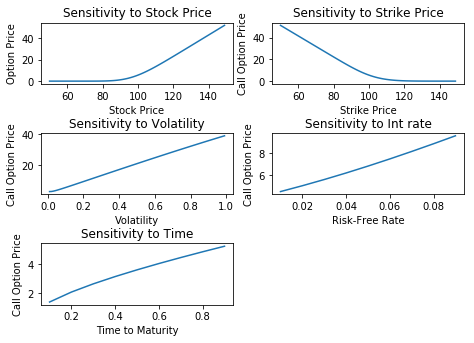

In [164]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sen_stock = [BS_model(i, var, strike_price, r_f, ttm).loc['Price']['Call'] for i in range(50,150)]
sen_strike = [BS_model(stock_price, var, i, r_f, ttm).loc['Price']['Call'] for i in range(50,150)]
sen_var = [BS_model(stock_price, i, strike_price, r_f, ttm).loc['Price']['Call'] for i in np.arange(1,100)/100]
sen_r_f = [BS_model(stock_price, var, strike_price, i, ttm).loc['Price']['Call'] for i in np.arange(1,10)/100]
sen_time = [BS_model(stock_price, var, strike_price, r_f, i).loc['Price']['Call'] for i in np.arange(1,10)/10]


stock = np.arange(50,150)
strike = np.arange(50,150)
var = np.arange(1,100)/100
r_f = np.arange(1,10)/100
time = np.arange(1,10)/10

plt.subplot(321)
plt.title('Sensitivity to Stock Price')
plt.ylabel('Option Price')
plt.xlabel('Stock Price')
plt.plot(stock,sen_stock )

plt.subplot(322)
plt.title('Sensitivity to Strike Price')
plt.ylabel('Call Option Price')
plt.xlabel('Strike Price')
plt.plot(stock,sen_strike)

plt.subplot(323)
plt.title('Sensitivity to Volatility')
plt.ylabel('Call Option Price')
plt.xlabel('Volatility')
plt.plot(var,sen_var)

plt.subplot(324)
plt.title('Sensitivity to Int rate')
plt.ylabel('Call Option Price')
plt.xlabel('Risk-Free Rate')
plt.plot(r_f,sen_r_f)

plt.subplot(325)
plt.title('Sensitivity to Time')
plt.ylabel('Call Option Price')
plt.xlabel('Time to Maturity')
plt.plot(time,sen_time)

plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.8,
                    wspace=0.2)

plt.show()